In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("home-prices.csv")
df

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000
5,5000,71000
6,2500,40000
7,2700,38000
8,1200,17000
9,5000,100000


In [3]:
df.head()


,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000


In [4]:
df.tail()

,area,price
5,5000,71000
6,2500,40000
7,2700,38000
8,1200,17000
9,5000,100000


In [9]:
df.shape

(10, 2)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.isnull()

,area,price
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
df.isnull().any()

area     False
price    False
dtype: bool

In [8]:
df.isnull().sum()

area     0
price    0
dtype: int64

Text(0.5, 1.0, 'Home Prices')

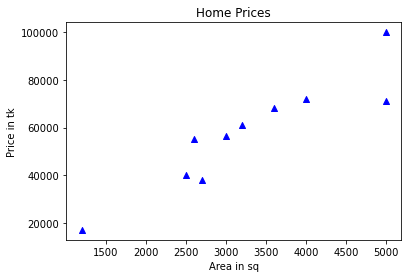

In [40]:
plt.scatter(df["area"], df["price"] , marker = "^" , color="blue")
plt.xlabel("Area in sq")
plt.ylabel("Price in tk")
plt.title("Home Prices")

# plt.plot(df["area"], df["price"])

In [10]:
x = df[["area"]]
y = df["price"] 

In [11]:
type(x)

pandas.core.frame.DataFrame

In [12]:
type(y)

pandas.core.series.Series

In [13]:
x

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,5000
6,2500
7,2700
8,1200
9,5000


In [14]:
y

0     55000
1     56500
2     61000
3     68000
4     72000
5     71000
6     40000
7     38000
8     17000
9    100000
Name: price, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y ,test_size = .30 , random_state=1)

In [18]:
xtrain


,area
4,4000
0,2600
3,3600
1,3000
7,2700
8,1200
5,5000


In [19]:
xtest

,area
2,3200
9,5000
6,2500


In [20]:
ytrain

4    72000
0    55000
3    68000
1    56500
7    38000
8    17000
5    71000
Name: price, dtype: int64

In [21]:
ytest

2     61000
9    100000
6     40000
Name: price, dtype: int64

In [22]:
from sklearn.linear_model import LinearRegression 

In [23]:
reg_obj = LinearRegression()

In [24]:
reg_obj.fit(xtrain , ytrain)

LinearRegression()

In [25]:
reg_obj.predict(xtest)

array([54577.95521897, 81852.07441554, 43971.35330919])

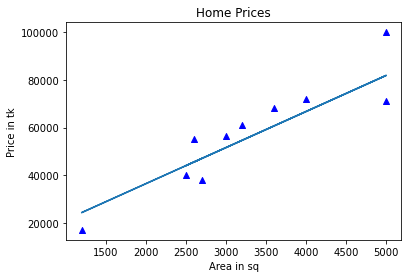

In [26]:
plt.scatter(df["area"], df["price"] , marker = "^" , color="blue")

plt.xlabel("Area in sq")
plt.ylabel("Price in tk")
plt.title("Home Prices")

plt.plot(df.area , reg_obj.predict(df[["area"]]))

#best fit line

In [27]:
reg_obj.predict([[3200]])

array([54577.95521897])

In [29]:
#y = mx + c
reg_obj.coef_

array([15.15228844])

In [32]:
reg_obj.intercept_

6090.632202831752

In [31]:
y = 15.15228844*3200+6090.632202831752
y

54577.95521083175

In [35]:
from sklearn.metrics import r2_score

In [37]:
r2_score(ytest , reg_obj.predict(xtest))

0.7916065214158408

In [38]:
reg_obj.score(xtest,ytest)

0.7916065214158408